In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


## Data Preparation

In [2]:
x = pd.read_csv("fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
Y = X_[:,0]
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [3]:
np.unique(Y,return_counts=True) # Balanced split

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [4]:
X_Train = X.reshape((-1,28,28,1))  # Gray Scale Image
Y_Train = np_utils.to_categorical(Y)

print(X_Train.shape, Y_Train.shape)

(60000, 28, 28, 1) (60000, 10)


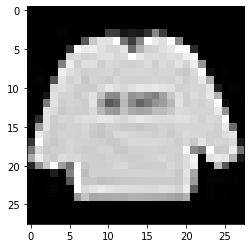

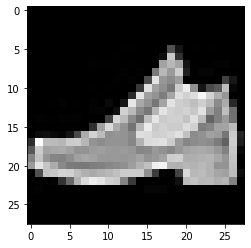

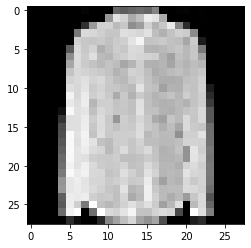

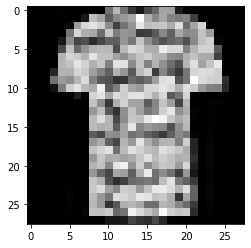

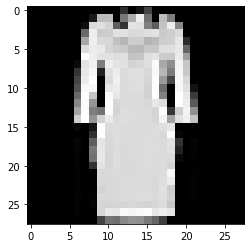

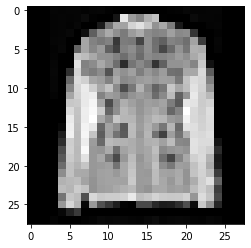

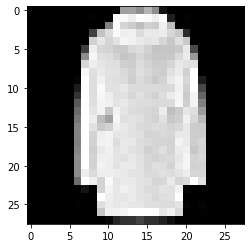

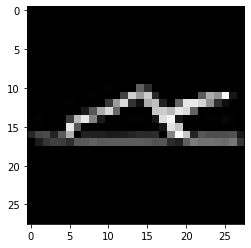

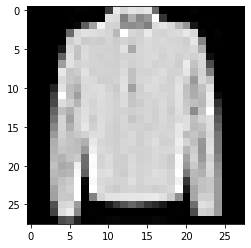

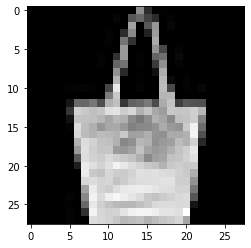

In [5]:
for i in range(10):
    plt.imshow(X_Train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(X_Train,Y_Train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 221s 5ms/step - loss: 0.7811 - accuracy: 0.7195 - val_loss: 0.5487 - val_accuracy: 0.8123
Epoch 2/10
48000/48000 [==============================] - 210s 4ms/step - loss: 0.4595 - accuracy: 0.8358 - val_loss: 0.4588 - val_accuracy: 0.8451
Epoch 3/10
48000/48000 [==============================] - 211s 4ms/step - loss: 0.3839 - accuracy: 0.8629 - val_loss: 0.3904 - val_accuracy: 0.8709
Epoch 4/10
48000/48000 [==============================] - 209s 4ms/step - loss: 0.3444 - accuracy: 0.8786 - val_loss: 0.3564 - val_accuracy: 0.8810
Epoch 5/10
48000/48000 [==============================] - 213s 4ms/step - loss: 0.3159 - accuracy: 0.8867 - val_loss: 0.3398 - val_accuracy: 0.8873
Epoch 6/10
48000/48000 [==============================] - 220s 5ms/step - loss: 0.2968 - accuracy: 0.8940 - val_loss: 0.3136 - val_accuracy: 0.8928
Epoch 7/10
 4352/48000 [=>............................] - ETA:

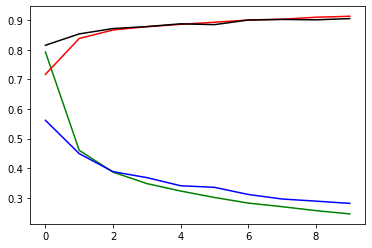

In [30]:
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [31]:
xt = pd.read_csv("fashion-mnist_test.csv")
Xt_ = np.array(xt)
Xt = Xt_[:,1:]
Xt = Xt/255.0
Yt = Xt_[:,0]
print(Xt.shape,Yt.shape)

(10000, 784) (10000,)


In [32]:
X_Test = Xt.reshape((-1,28,28,1))  # Gray Scale Image
Y_Test = np_utils.to_categorical(Yt)

print(X_Test.shape, Y_Test.shape)

(10000, 28, 28, 1) (10000, 10)


In [33]:
pred = model.predict(X_Test)

In [34]:
print(pred.shape)

(10000, 10)


In [35]:
ans = []
for i in pred:
    ans.append(np.argmax(i))

In [38]:
pred_op = np.array(ans)
print(pred_op.shape)

(10000,)


In [40]:
acc = np.sum(pred_op==Yt)/Yt.shape[0]
print(acc)

0.9084


In [41]:
from sklearn.metrics import confusion_matrix
from visualizes import plot_confusion_matrix

In [42]:
cnf_matrix = confusion_matrix(pred_op,Yt)
print(cnf_matrix)

[[845   1   7  16   1   0 103   0   0   0]
 [  1 979   0   6   1   0   2   0   1   0]
 [ 18   0 856   8  23   1  61   0   6   0]
 [ 18  14   9 904  19   0  20   0   3   0]
 [  3   1  68  30 892   0  65   0   3   0]
 [  1   1   0   2   1 969   0   8   6   0]
 [106   4  54  33  63   0 744   0   7   0]
 [  1   0   0   0   0  19   0 955   6  26]
 [  7   0   6   1   0   0   5   0 966   0]
 [  0   0   0   0   0  11   0  37   2 974]]


Confusion matrix, without normalization
[[845   1   7  16   1   0 103   0   0   0]
 [  1 979   0   6   1   0   2   0   1   0]
 [ 18   0 856   8  23   1  61   0   6   0]
 [ 18  14   9 904  19   0  20   0   3   0]
 [  3   1  68  30 892   0  65   0   3   0]
 [  1   1   0   2   1 969   0   8   6   0]
 [106   4  54  33  63   0 744   0   7   0]
 [  1   0   0   0   0  19   0 955   6  26]
 [  7   0   6   1   0   0   5   0 966   0]
 [  0   0   0   0   0  11   0  37   2 974]]


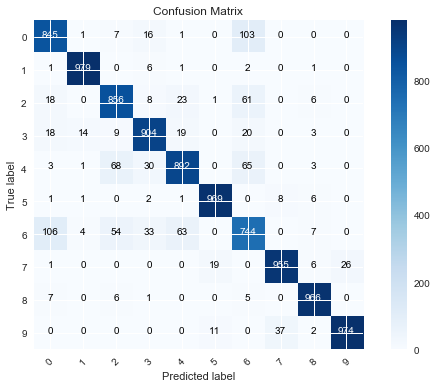

In [44]:
plt.style.use('seaborn')
plot_confusion_matrix(cnf_matrix,classes=[0,1,2,3,4,5,6,7,8,9],title="Confusion Matrix")